In [2]:
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
# import gdal
# from osgeo import gdal
# import rasterio
# # el nodata hace referencia  los NANS
# import os

# import numpy as np
# import matplotlib.pyplot as plt

import rasterio
import rasterio.mask


from rasterio.plot import show
from rasterio.mask import mask # para seleccionar un poligono

from shapely.geometry.polygon import Polygon

import geopandas as gpd
from shapely.geometry import mapping
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

import os
import re

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC, SDS
import pyproj

ModuleNotFoundError: No module named 'pyhdf'

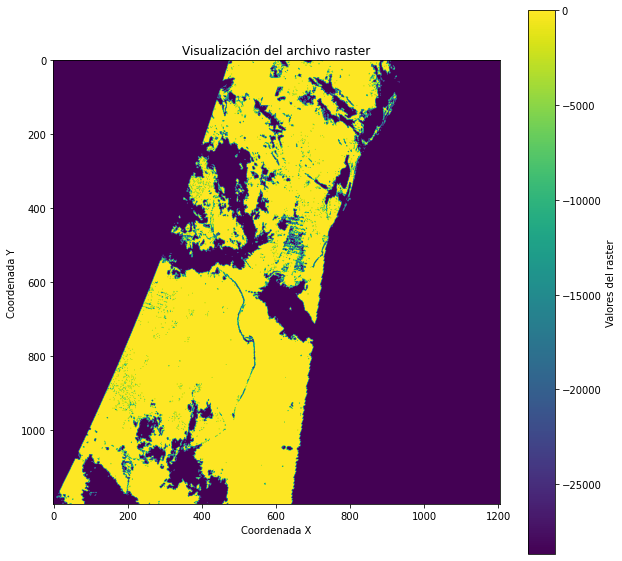

In [5]:
# Ruta al archivo raster
archivo_raster = 'D:/Josefina/Proyectos/ProyectoChile/shape/geotiff/2022003-BA.tif'

# Abrir y leer el archivo raster
with rasterio.open(archivo_raster) as src:
    raster = src.read(1)  # Lee la primera banda del raster

# Visualizar el raster
plt.figure(figsize=(10, 10))
plt.imshow(raster, cmap='viridis')  # Puedes cambiar el colormap según tu preferencia
plt.colorbar(label='Valores del raster')
plt.title('Visualización del archivo raster')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

Transformación: | 0.02, 0.00,-65.27|
| 0.00,-0.01,-30.00|
| 0.00, 0.00, 1.00|
CRS: GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
Coordenadas de la esquina superior izquierda: ( -65.270364457 , -29.999999997 )


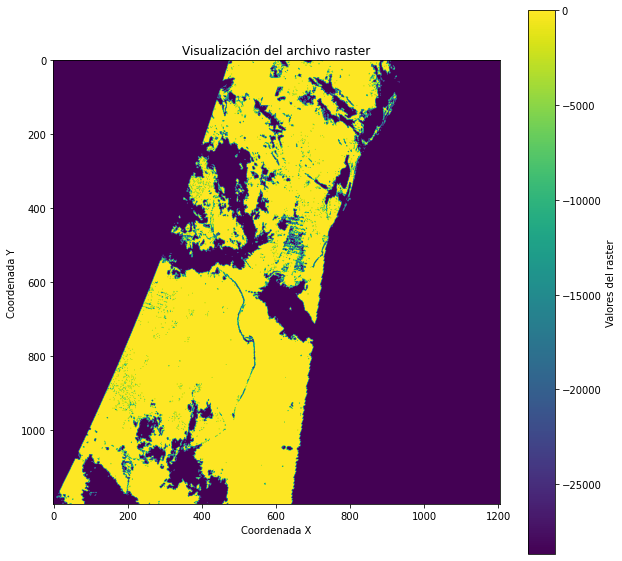

In [8]:
with rasterio.open(archivo_raster) as src:
    transform = src.transform
    crs = src.crs

    # Imprimir la transformación y el CRS
    print('Transformación:', transform)
    print('CRS:', crs)
    
    # Obtener las coordenadas de la esquina superior izquierda
    x_min, y_max = transform * (0, 0)
    print('Coordenadas de la esquina superior izquierda: (', x_min, ',', y_max, ')')
    # Visualizar el raster
plt.figure(figsize=(10, 10))
plt.imshow(raster, cmap='viridis')  # Puedes cambiar el colormap según tu preferencia
plt.colorbar(label='Valores del raster')
plt.title('Visualización del archivo raster')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

In [11]:
import rasterio
from rasterio.transform import Affine
from rasterio.crs import CRS

# Definir la transformación de afinidad y el CRS
transform = Affine(0.02, 0.0, -65.27, 0.0, -0.01, -30.00)
# crs = CRS.from_epsg(4326)
crs = CRS.from_string('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

# Ruta al archivo raster original y al archivo georreferenciado
archivo_raster_original = 'D:/Josefina/Proyectos/ProyectoChile/shape/geotiff/2022003-BA.tif'
archivo_raster_georreferenciado = 'D:/Josefina/Proyectos/ProyectoChile/shape/geotiff/2022003-BA_georreferenciado.tif'

# Abrir el archivo raster original y escribir el nuevo archivo georreferenciado
with rasterio.open(archivo_raster_original) as src:
    # Leer los datos del raster original
    raster_data = src.read()
    perfil = src.profile

    # Actualizar el perfil con la transformación y el CRS
    perfil.update({
        'transform': transform,
        'crs': crs
    })

    # Escribir los datos en un nuevo archivo georreferenciado
    with rasterio.open(archivo_raster_georreferenciado, 'w', **perfil) as dst:
        dst.write(raster_data)

In [ ]:
https://drivendata.co/blog/predict-pm25-benchmark

In [3]:
import pyproj
import numpy as np
import numpy.ma as ma
from collections import OrderedDict
import sys
from pyhdf import SD
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER